## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps 
1. Reading, and Understanding the Data
2. Visualising the Data
3. Data Preparation
4. Splitting Data into Training and Testing sets (Rescaling Features as well)
5. Feature Selection and Building Linear Model 
6. Residual Analysis of the train data
7. Predictions
8. Model Evaluation

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')
pd.set_option('display.max_columns', None)

## Step 1: Reading and Understanding the Data

In [2]:
# reading the dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


=========================================
**Dataset characteristics**
=========================================<br>	
Our Dataframe has the following fields:
	
- **instant**: record index
- **dteday**: date
- **season**: season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr**: year (0: 2018, 1:2019)
- **mnth**: month ( 1 to 12)
- **holiday**: weather day is a holiday or not
- **weekday**: day of the week
- **workingday**: If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit**: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [3]:
# checking shape of the dataset
df.shape

(730, 16)

In [4]:
# checking for nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Our data has no null values.  

## Step 2: Visualising the Data

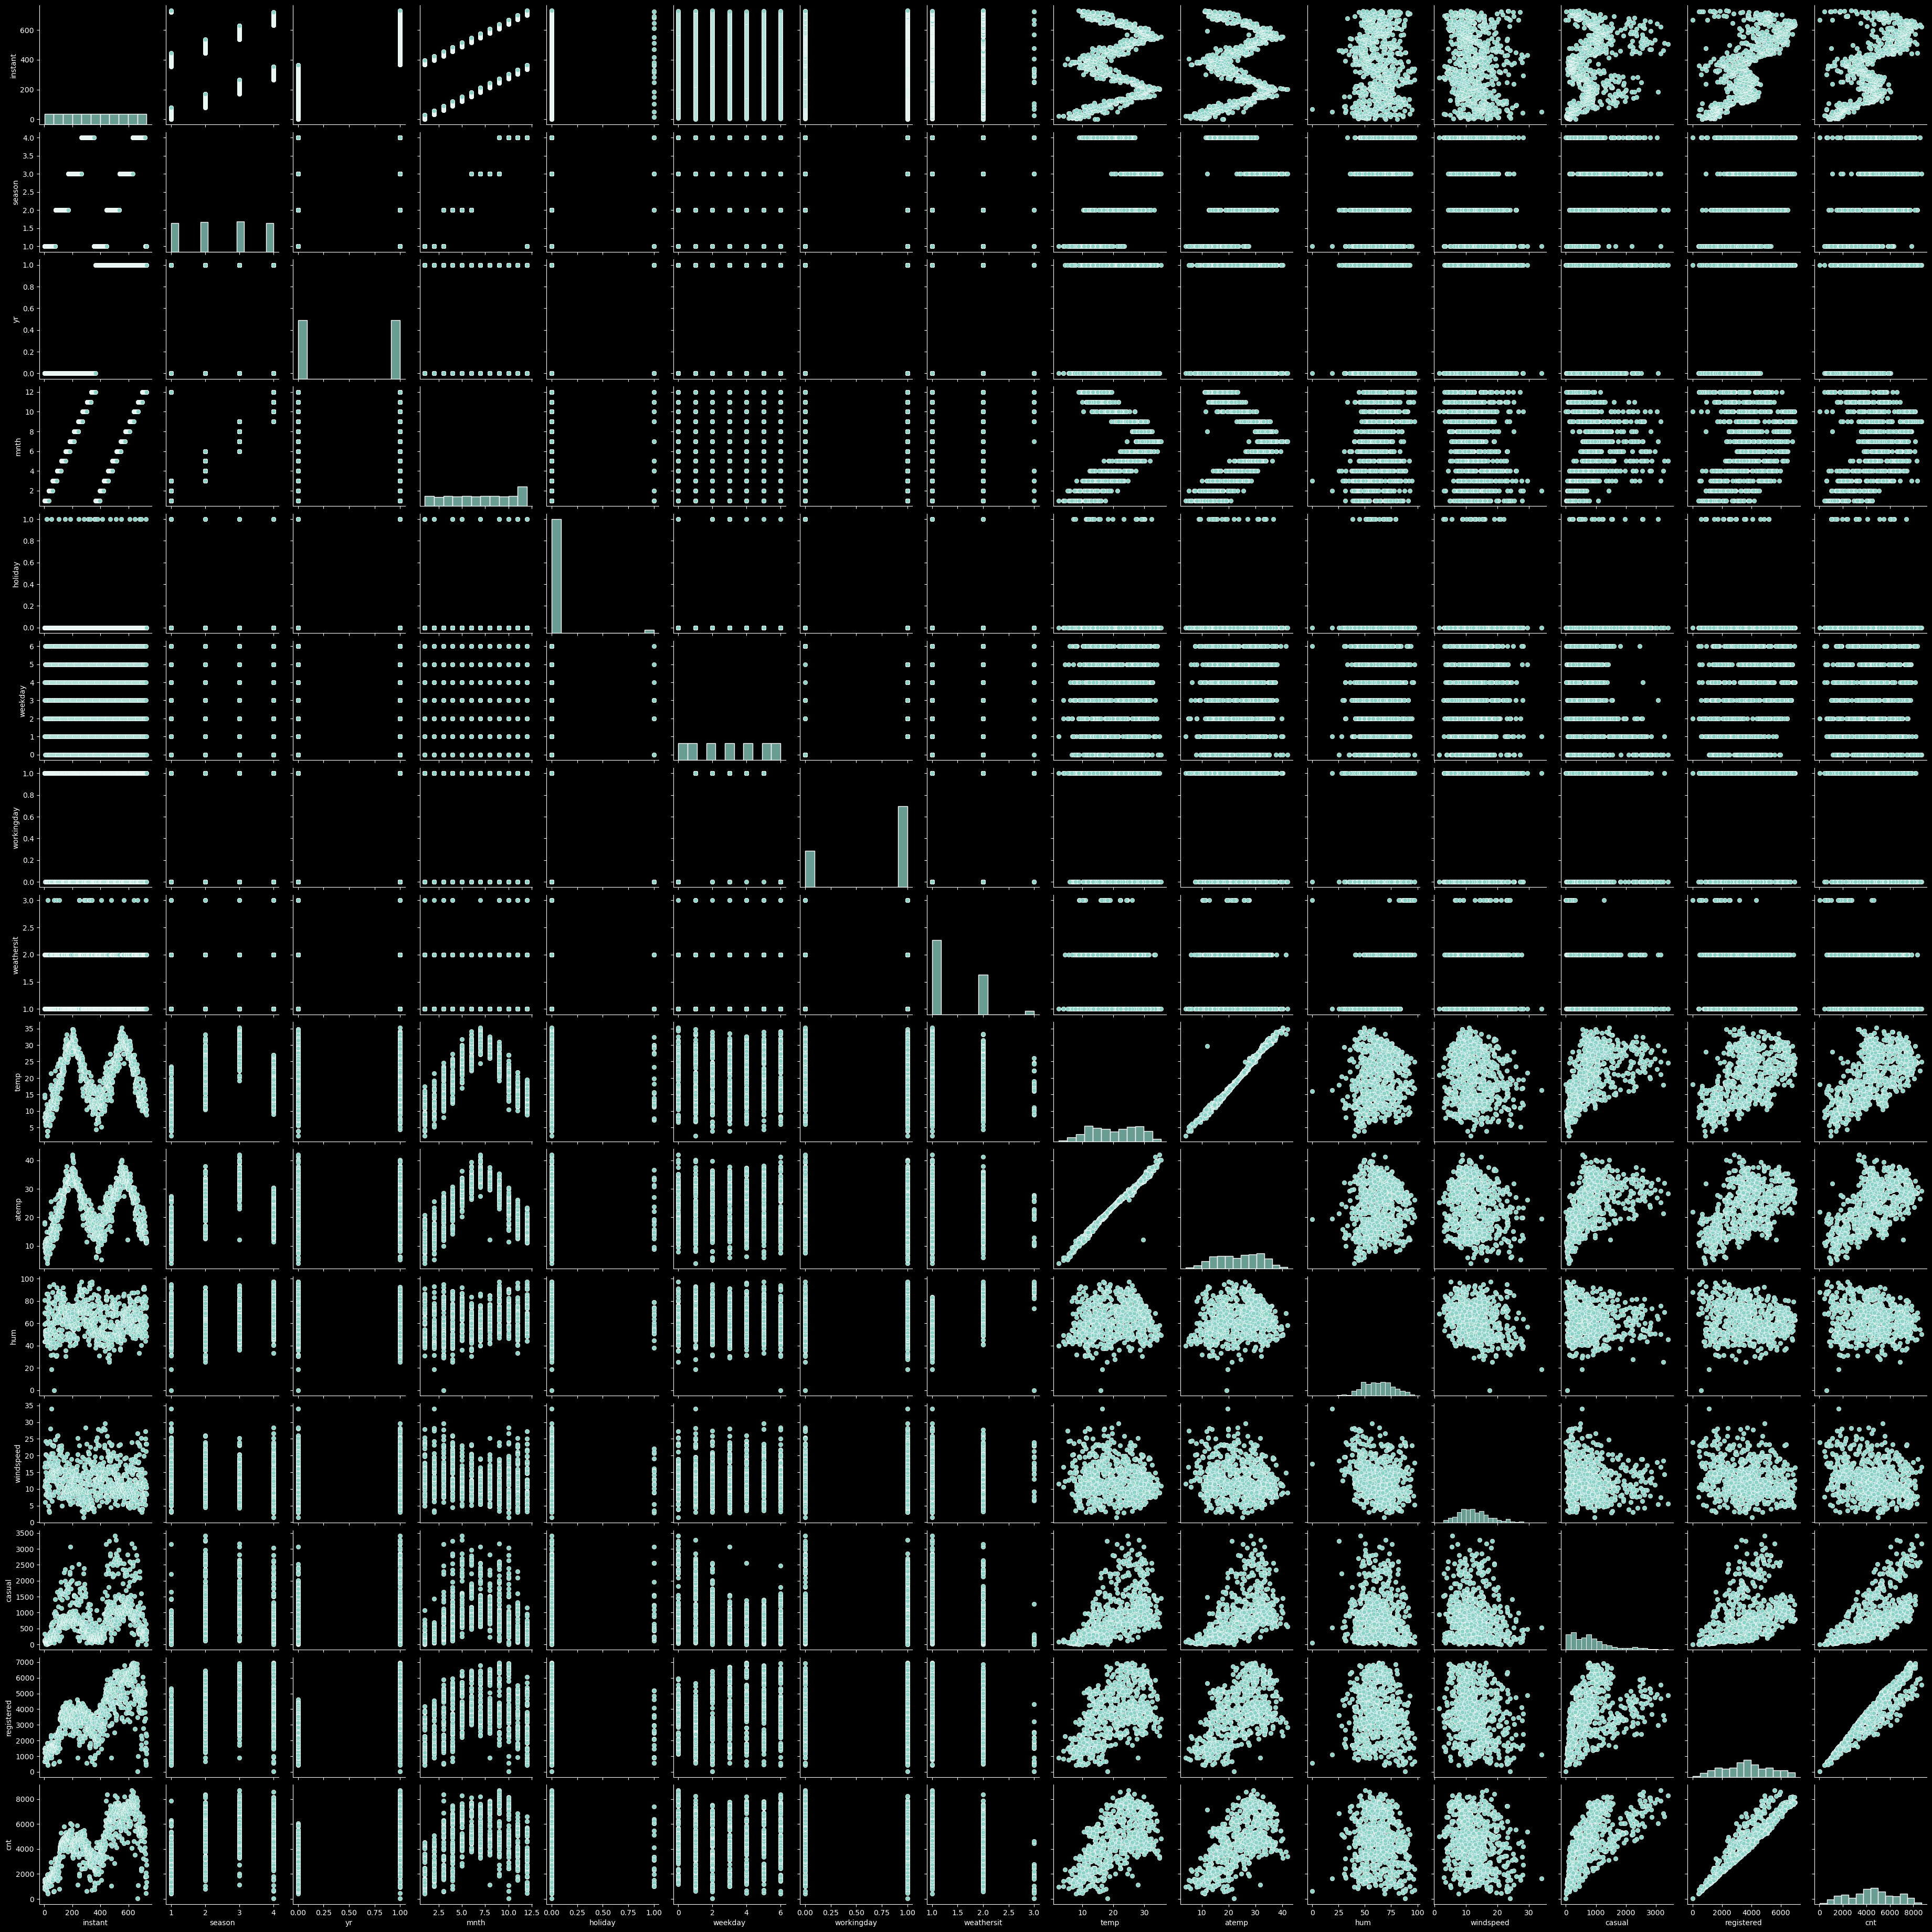

In [5]:
# plotting pairplot for numerical variables 
sns.pairplot(df)
plt.show() 

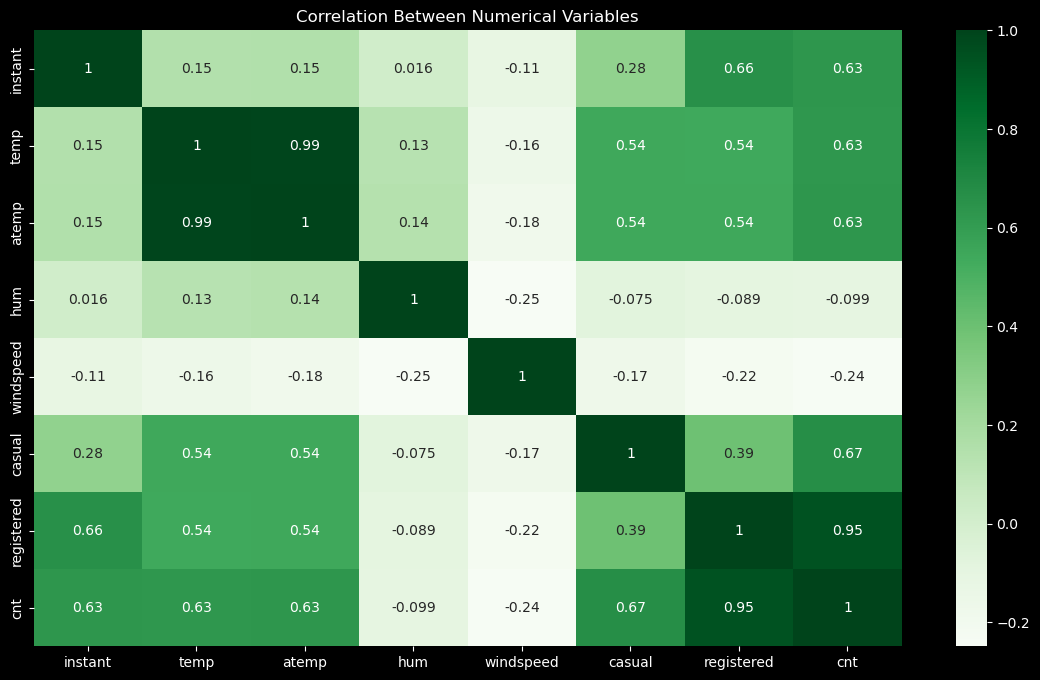

In [6]:
# plotting heatmap for numerical variables
num_vars = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# plotting heatmap for the numerical vars to check correlation
plt.figure(figsize=(14, 8))
sns.heatmap(df[num_vars].corr(), annot=True, cmap='Greens')
plt.title('Correlation Between Numerical Variables')
plt.show()

- There is a very high positive linear correlation between temp and atemp, we can drop atemp since both of the variables are telling about temperature and are highly collinear. 
- We also see a good positive linear relationship between registered and cnt, which signifies registered captures the variance of cnt pretty well. It also means that more the registered users, more will be the cnt because its obvious since cnt = registered + casual. 
- Similarly, there is a postivie linear relationship between cnt and casual, because of the same reason as in above point.
- And, registered and casual are positively correlated with each other as well, which makes a case of multicollinearity.
- Another relationship that we can see is between temp and cnt. Although not very strong, but its a positive relationship.
---

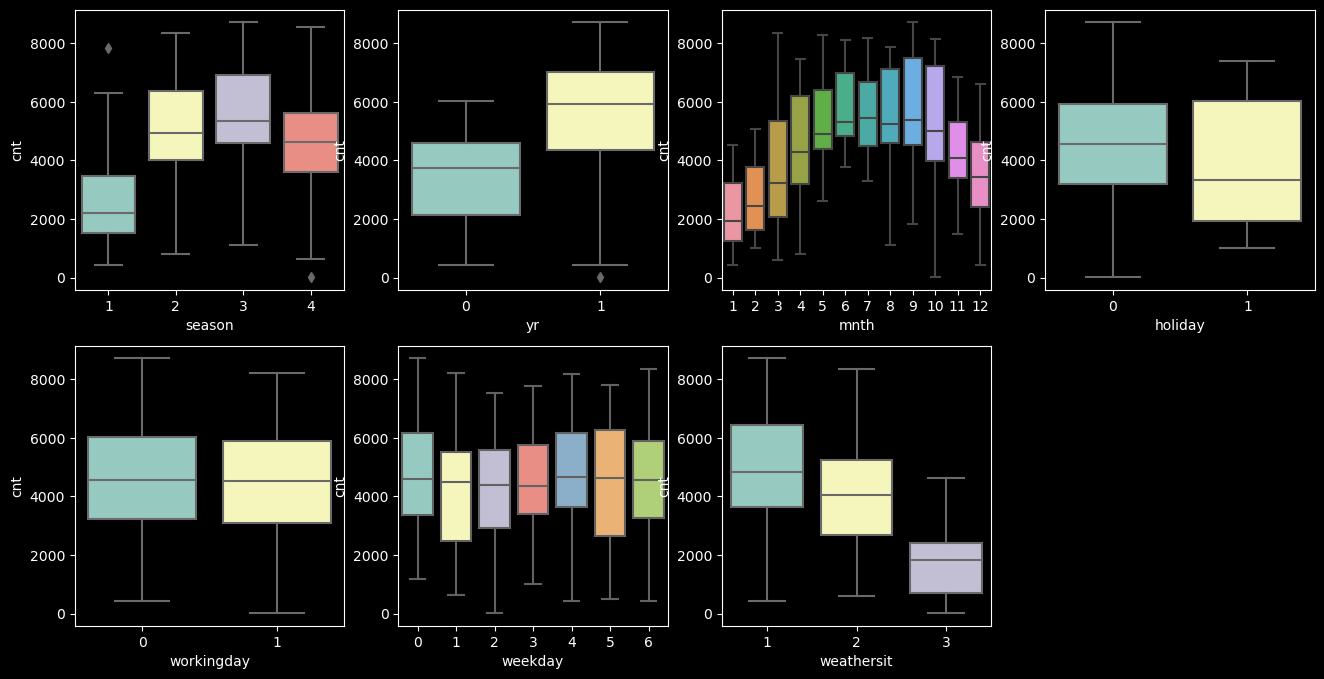

In [7]:
# boxplots for categorical variables
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
plt.figure(figsize=(16,8))
for i in range(len(cat_vars)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[cat_vars[i]], y=df.cnt)
plt.show()

- From above box plots we can derive following insights:
    1. Season 3 i.e. 'fall' season sees the most number of users on an average using bikes and season 1 i.e.'Spring' sees the least.
    2. There is an increase in number of users using bikes from 2018 to 2019. 
    3. On an average, most number of users come to use Boombikes from June to October which is around 'fall' season only. 
    4. Whether it is a holiday or workingday does not impact much on our target variable. Although, on holidays few people use boombike.
    5. Most users use Boombike when its a clear weather and not when its rainy. 

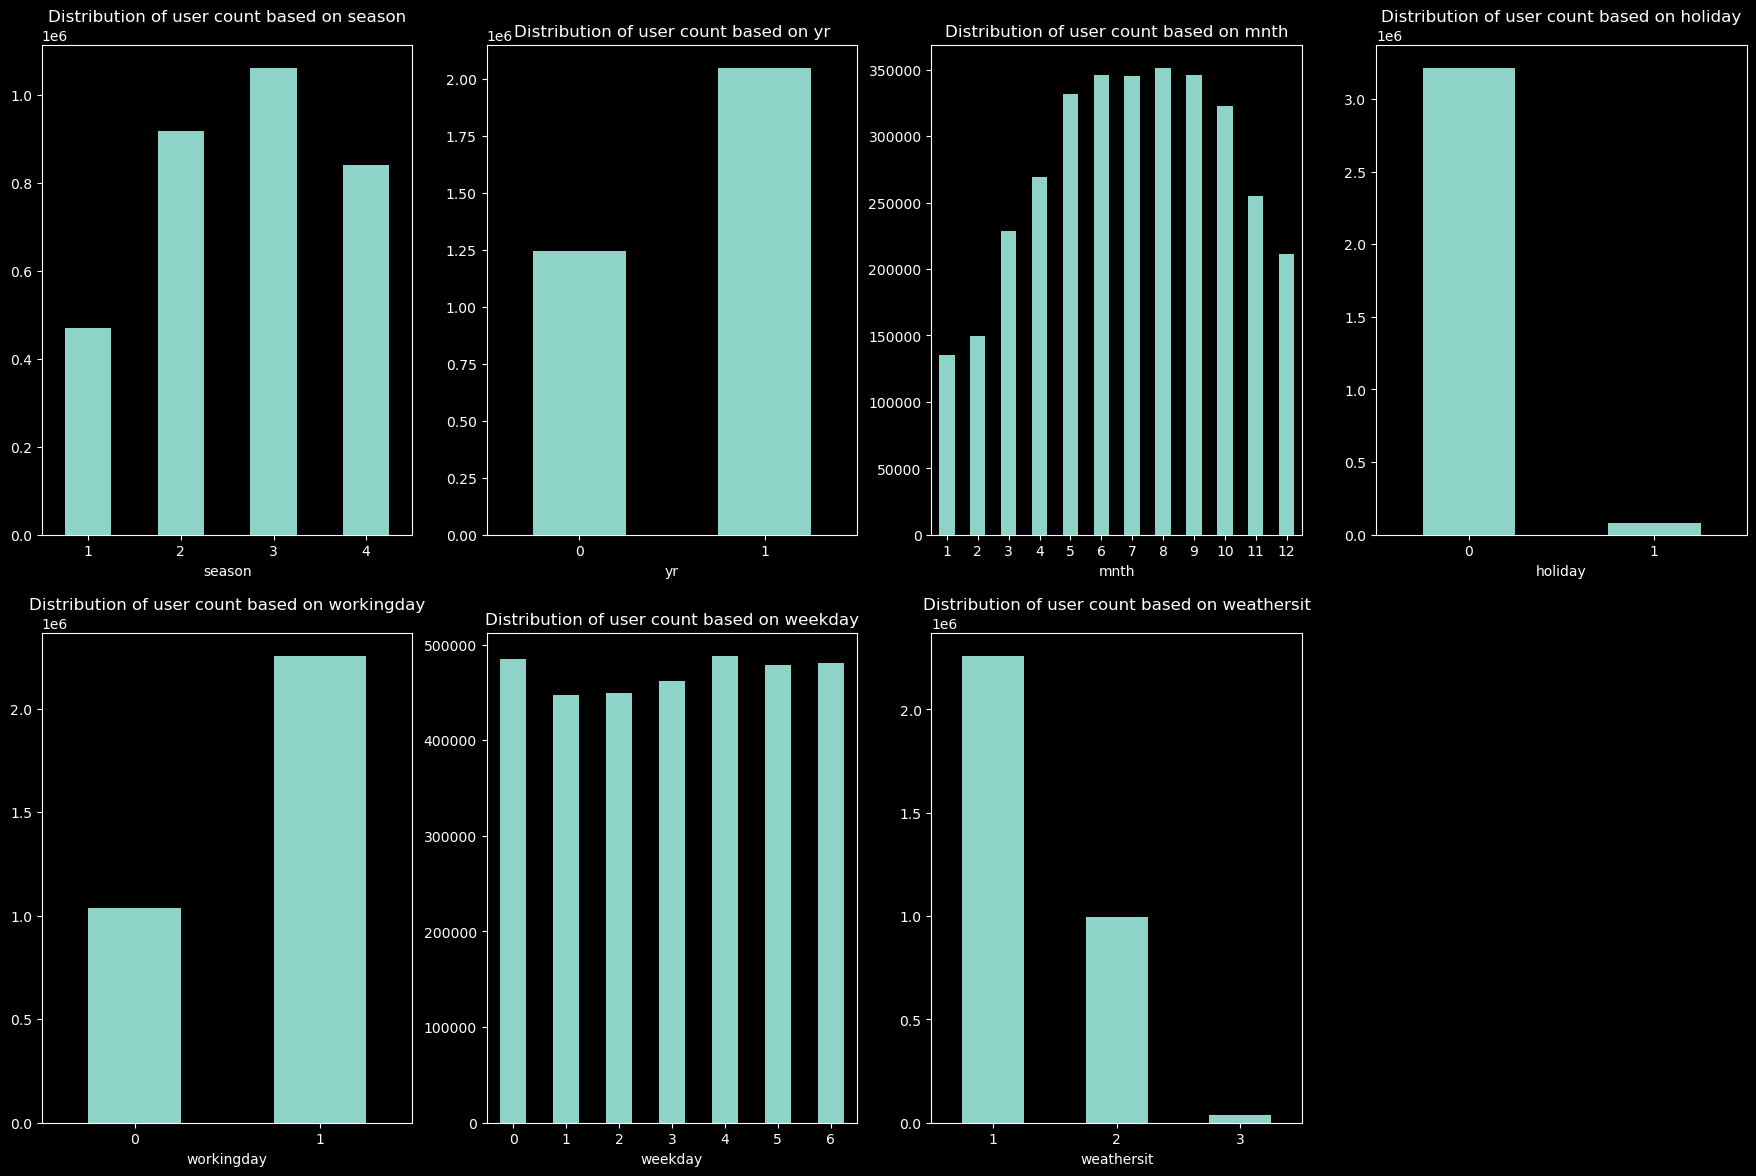

In [131]:
# plotting to see the odstribution of user count based on each categorical variable 
df_copy = pd.read_csv('day.csv') 
plt.figure(figsize=(22,14))
for i in range(len(cat_vars)):
    plt.subplot(2,4,i+1)
    df_copy.groupby(cat_vars[i])['cnt'].sum().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title("Distribution of user count based on {}".format(cat_vars[i]))

plt.show() 

## Step 3: Data Preparation
- Changing mnth, weekday, weathersit & season column's numerical values to categorical variables since there is no linear order associated with those labels. 
- In mnth changing:
    - 1,2,3..12 -> Jan, Feb, Mar, .. , Dec
- In weekday changing:
    - 1,2,3,...,7 -> Mon, Tue, Wed, .. , Sun
- In weathersit changing:
    - 1 -> Clear
    - 2 -> Mist
    - 3 -> Rainy
- In Season changing:
    - 1 -> Spring
    - 2 -> Summer
    - 3 -> Fall
    - 4 -> Winter

In [8]:
# replacing numerical values with categorical values in weathersit column
df.weathersit = df.weathersit.replace([1,2,3], ['Clear', 'Mist', 'Rainy'])
df.weathersit.value_counts() 

weathersit
Clear    463
Mist     246
Rainy     21
Name: count, dtype: int64

In [9]:
# replacing numerical values with categorical values in season column
df.season = df.season.replace([1,2,3,4], ['Spring', 'Summer', 'Fall', 'Winter'])
df.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [10]:
# mapping months to jan, feb, .., dec
df.mnth = df.mnth.map({1:'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun',
                       7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',11:'Nov', 12:'Dec'})
df.mnth.value_counts() 

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [11]:
# mapping weekday
df.weekday = df.weekday.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})
df.weekday.value_counts()

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

### Dropping Redundant Variables
- dteday -> (date is not required for this linear model, we have month and year columns and instance can be used as no. of days since app has been launched. So, we don't require this column)
- atemp -> this is same as temp
- registered and casual -> We need to predict the demand only, so we cannot have these as our feature variables. It will lead to overfitting of the model and will not help at all since these values only we need to predict.

In [12]:
# dropping atemp and dteday
df.drop(columns=['dteday', 'atemp', 'casual', 'registered'], inplace=True) 
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,2,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,3,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,4,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,5,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [13]:
# let's rename the instant column to days
# days column will show us 'no. of days since company started'
df.rename(columns={'instant':'days'}, inplace=True)

In [14]:
# describing data
df.describe()

,days,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


- Our dataset ranges from 1st January, 2018 to 31st December, 2019 which is two years of BoomBikes' data.

### Creating Dummy Variables 

In [15]:
mnth_dummy    = pd.get_dummies(df.mnth,       drop_first=True, dtype=int)
weekday_dummy = pd.get_dummies(df.weekday,    drop_first=True, dtype=int)
weather_dummy = pd.get_dummies(df.weathersit, drop_first=True, dtype=int)
season_dummy  = pd.get_dummies(df.season,     drop_first=True, dtype=int)  

- Creating n - 1 dummy variables where n is number of categories in the variable. 
    - For eg: in season we have 4 categories:
        - Summer, winter, spring and fall
        - So creating only 3 dummy variables for season because if 3 of them is 0 it means its the 4th season. 
        - This is done to avoid multicollinearity and overfitting

In [16]:
# dropping these variables now 
df.drop(columns=['mnth', 'weekday', 'weathersit', 'season'], inplace=True)

In [17]:
# merging dummy variables
df = pd.concat([df, season_dummy, weather_dummy, mnth_dummy, weekday_dummy], axis=1)
df.head() 

,days,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,Rainy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


- Following dummy vars were dropped to avoid multicollinearity
    - **Fall** dropped:   If it's not Spring or summer or winter, its Fall
    - **Clear** dropped:  If it's not mist or rainy, its Clear
    - **April** dropped:  Similarly, its april if all rest months are False
    - **Friday** dropped: Similarly, its Friday if all rest weekdays are False

## Step 4: Splitting Dataframe into Training and Testing sets

### Train-Test Split

In [18]:
# splitting dataframe into train and test
df_train, df_test = train_test_split(df, train_size=0.7) 

In [19]:
# checking the shape of train and test data
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling Data
- We will not rescale the columns having 0 & 1 since they are already rescaled.

In [20]:
# instantiate an object
scaler = MinMaxScaler()

#list of numerical variables without 0s and 1s
num_vars = ['days', 'temp', 'hum', 'windspeed', 'cnt']

# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head() 

,days,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,Rainy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
264,0.362140,0,0,0,0.709254,0.910249,0.179027,0.559358,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
491,0.673525,1,0,1,0.596072,0.607010,0.401068,0.732568,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
291,0.399177,0,0,1,0.601354,0.901498,0.428376,0.281495,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
190,0.260631,0,0,1,0.857742,0.497610,0.298808,0.569436,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
728,0.998628,1,0,1,0.245101,0.376526,0.660846,0.207899,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
# verifying rescaling 
# by checking max and min values of all cols must be 1 & 0 resp.
df_train.describe() 

,days,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Mist,Rainy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.502286,0.501961,0.029412,0.678431,0.538359,0.562661,0.311181,0.522710,0.24902,0.250980,0.250980,0.356863,0.025490,0.082353,0.086275,0.084314,0.084314,0.074510,0.082353,0.084314,0.082353,0.086275,0.084314,0.092157,0.139216,0.149020,0.147059,0.125490,0.160784,0.137255
std,0.291219,0.500487,0.169124,0.467537,0.224612,0.180074,0.163107,0.225452,0.43287,0.434003,0.434003,0.479544,0.157763,0.275172,0.281045,0.278131,0.278131,0.262857,0.275172,0.278131,0.275172,0.281045,0.278131,0.289531,0.346511,0.356457,0.354512,0.331599,0.367693,0.344454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251715,0.000000,0.000000,0.000000,0.340632,0.429102,0.197838,0.363061,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501372,1.000000,0.000000,1.000000,0.531173,0.557886,0.288689,0.532579,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753772,1.000000,0.000000,1.000000,0.736253,0.694504,0.401550,0.696062,0.00000,0.750000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Scaling is done properly on training set. Now we can move on to build our linear model

## Step: 5 Feature Selection and Building Linear Model

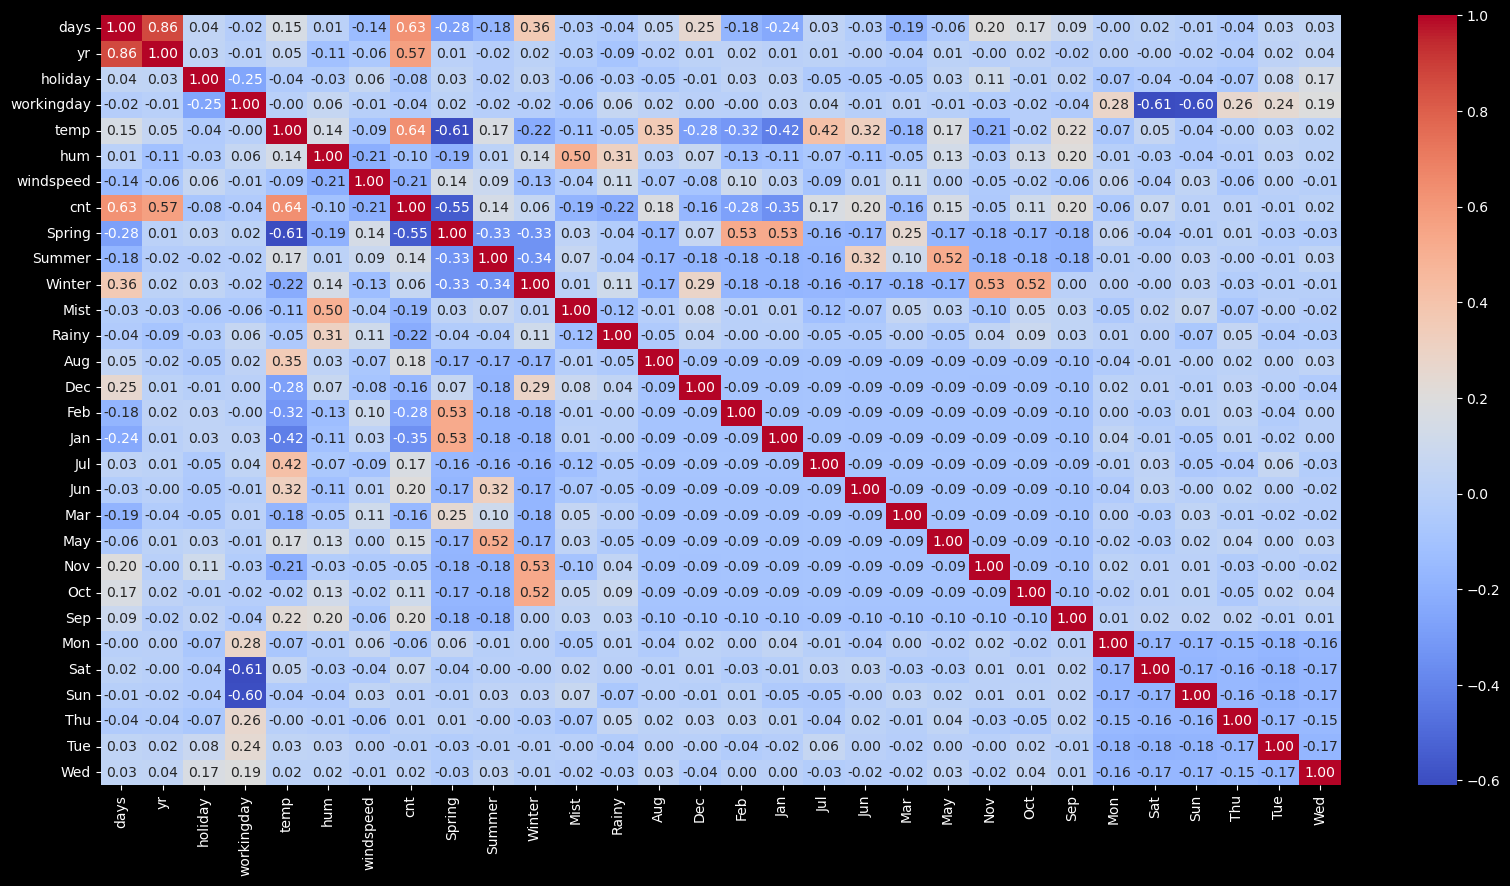

In [22]:
# heatmap to plot the correlation between all the new variables 
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show() 

- We will start off with one of the variables that is highly correlated with our target variable 'cnt' which is 'temp'.
- Let's build our first model using 'temp' as feature variable and 'cnt' as target variable

### Train-Test Split on df_train

In [23]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
# all features 
X_train.head(2)

,days,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Mist,Rainy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
264,0.362140,0,0,0,0.709254,0.910249,0.179027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
491,0.673525,1,0,1,0.596072,0.607010,0.401068,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [25]:
# response
y_train.head(2)

264    0.559358
491    0.732568
Name: cnt, dtype: float64

### Recursive Feature Elimination (RFE) 
- Let's use RFE to select 20 best variables for our model based on their significance and VIF (Variance Inflation Factor).
- From there on, we will remove variables if they are insignificant or having high VIF value to refine model.

In [26]:
# creating model using all variables first
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# running RFE to select 10 best variables
rfe = RFE(linear_model, n_features_to_select=10) 
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [27]:
# let's print the top10 variables selected by RFE 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('days', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 19),
 ('Winter', True, 1),
 ('Mist', False, 10),
 ('Rainy', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 4),
 ('Feb', False, 8),
 ('Jan', False, 7),
 ('Jul', False, 18),
 ('Jun', False, 9),
 ('Mar', False, 11),
 ('May', False, 2),
 ('Nov', False, 5),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', False, 17),
 ('Sat', False, 15),
 ('Sun', False, 14),
 ('Thu', False, 20),
 ('Tue', False, 13),
 ('Wed', False, 16)]

In [28]:
# now let's build a model using best 10 variables selected by RFE
best_10_vars = X_train.columns[rfe.support_]
best_10_vars

Index(['days', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Rainy', 'Sep'],
      dtype='object')

In [29]:
# let's also check the variables that were not selected by RFE
not_selectedVars = X_train.columns[~rfe.support_] 
not_selectedVars

Index(['workingday', 'Summer', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

#### Building Linear Model using Stats Models

In [75]:
# creating X_train using RFE selected variables
X_train_rfe = X_train[best_10_vars] 

In [76]:
# adding a constant 
X_train_rfe = sm.add_constant(X_train_rfe)

# creating first model using statsmodels
lm = sm.OLS(y_train, X_train_rfe).fit()

# printing summary 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.4
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          1.62e-182
Time:                        00:16:56   Log-Likelihood:                 482.96
No. Observations:                 510   AIC:                            -943.9
Df Residuals:                     499   BIC:                            -897.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3602      0.028     12.703      0.000       0.305       0.416
days          -0.1602      0.049     -3.279      0.001      -0.256      -0.064
yr             0.3100      0.026     12.028      0.000       0.259       0.361
holiday       -0.0985      0.025     -3.940      0.000      -0.148      -0.049
temp           0.5064      0.030     16.844      0.000       0.447       0.565
hum           -0.2299      0.026     -8.691      0.000      -0.282      -0.178
windspeed     -0.1537      0.027     -5.624      0.000      -0.207      -0.100
Spring        -0.1300      0.016     -8.216      0.000      -0.161      -0.099
Winter         0.0934      0.017      5.568      0.000       0.060       0.126
Rainy         -0.1599      0.029     -5.553      0.000      -0.216      -0.103
Sep            0.0846      0.016      5.456      0.000       0.054       0.115
==============================================================================
Omnibus:                       76.010   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.614
Skew:                          -0.840   Prob(JB):                     1.20e-33
Kurtosis:                       5.077   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We got a R-squared of 0.826 and adj R-squared of 0.823 which is pretty good.<br>
- Also, all 10 variables are significant since their p-value is 0.
- Let's try adding more variables and see if we can further improve our model. 

In [77]:
# let's check not selected vars by RFE and pick from these
not_selectedVars

Index(['workingday', 'Summer', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [78]:
# adding new variable 'Summer' to our model to check if it improves
X_train_new = X_train_rfe
X_train_new['Summer'] = X_train['Summer']

Rebuilding model after adding `Summer` season

In [79]:
# we had already added the constant in X_train_rfe so we don't need to add it again
# running linear model
lm = sm.OLS(y_train, X_train_new).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.1
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          4.65e-184
Time:                        00:17:06   Log-Likelihood:                 489.45
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     498   BIC:                            -904.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.034      8.432      0.000       0.222       0.357
days          -0.0807      0.053     -1.520      0.129      -0.185       0.024
yr             0.2686      0.028      9.600      0.000       0.214       0.324
holiday       -0.1021      0.025     -4.127      0.000      -0.151      -0.053
temp           0.5559      0.033     16.963      0.000       0.492       0.620
hum           -0.2455      0.027     -9.263      0.000      -0.298      -0.193
windspeed     -0.1645      0.027     -6.054      0.000      -0.218      -0.111
Spring        -0.0698      0.023     -3.039      0.002      -0.115      -0.025
Winter         0.1196      0.018      6.601      0.000       0.084       0.155
Rainy         -0.1522      0.029     -5.332      0.000      -0.208      -0.096
Sep            0.1006      0.016      6.301      0.000       0.069       0.132
Summer         0.0563      0.016      3.583      0.000       0.025       0.087
==============================================================================
Omnibus:                       77.480   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.224
Skew:                          -0.871   Prob(JB):                     6.51e-33
Kurtosis:                       4.986   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Not much change in r-squared, only increased by 0.05.
- Summer's p-value is 0 showing it is significant.
- Days p-value has increased making it insignificant.
- Let's drop `days` and try adding `workingday` as well to see if model improves

In [80]:
# adding 'workingday'
X_train_new = X_train_new.drop('days', axis=1)
X_train_new['workingday'] = X_train['workingday']

# rebuilding model 
lm = sm.OLS(y_train, X_train_new).fit()

# printing summary of our latest model without days and dec variables
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          3.66e-184
Time:                        00:17:48   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     498   BIC:                            -904.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2779      0.032      8.734      0.000       0.215       0.340
yr             0.2282      0.008     26.955      0.000       0.212       0.245
holiday       -0.1141      0.026     -4.471      0.000      -0.164      -0.064
temp           0.5550      0.033     16.942      0.000       0.491       0.619
hum           -0.2469      0.026     -9.351      0.000      -0.299      -0.195
windspeed     -0.1636      0.027     -6.025      0.000      -0.217      -0.110
Spring        -0.0550      0.021     -2.657      0.008      -0.096      -0.014
Winter         0.1085      0.017      6.459      0.000       0.075       0.141
Rainy         -0.1487      0.029     -5.214      0.000      -0.205      -0.093
Sep            0.0976      0.016      6.121      0.000       0.066       0.129
Summer         0.0655      0.014      4.580      0.000       0.037       0.094
workingday    -0.0154      0.009     -1.670      0.096      -0.034       0.003
==============================================================================
Omnibus:                       84.507   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.010
Skew:                          -0.935   Prob(JB):                     2.43e-36
Kurtosis:                       5.054   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After dropping days and adding workingday, there is no change in R-squared and we can see a p-value of 0.096 for `workingday` making it insignificant.
- Let's drop 'workingday' and try adding 'Sun'.
- The reason I am adding Sunday is because its a holiday, let's see if there is positive change in R-squared

In [81]:
# dropping days
# dropping working day and adding sunday
X_train_new = X_train_new.drop('workingday', axis=1)
X_train_new['Sun'] = X_train['Sun']

# rebuilding model 
lm = sm.OLS(y_train, X_train_new).fit()

# printing summary of our latest model without days and dec variables
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          1.01e-183
Time:                        00:19:07   Log-Likelihood:                 488.65
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     498   BIC:                            -902.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2659      0.031      8.474      0.000       0.204       0.328
yr             0.2282      0.008     26.892      0.000       0.212       0.245
holiday       -0.1025      0.025     -4.132      0.000      -0.151      -0.054
temp           0.5564      0.033     16.943      0.000       0.492       0.621
hum           -0.2488      0.026     -9.412      0.000      -0.301      -0.197
windspeed     -0.1649      0.027     -6.056      0.000      -0.218      -0.111
Spring        -0.0547      0.021     -2.634      0.009      -0.095      -0.014
Winter         0.1089      0.017      6.468      0.000       0.076       0.142
Rainy         -0.1486      0.029     -5.192      0.000      -0.205      -0.092
Sep            0.0983      0.016      6.158      0.000       0.067       0.130
Summer         0.0659      0.014      4.601      0.000       0.038       0.094
Sun            0.0102      0.012      0.863      0.389      -0.013       0.033
==============================================================================
Omnibus:                       83.107   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.838
Skew:                          -0.920   Prob(JB):                     7.20e-36
Kurtosis:                       5.057   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After adding Sun and removing workingday, there is no significant change in R-squared (it is 0.830) and we can see a high p-value for 'Sun' making it insignificant.
- It means there is no significant change in demand when its Sunday.
- Let's drop 'Sun' as well. 
- We can see that we can not further improve our model, no matter what variable we add. 
- Let's try a last variable mist as well. 

In [82]:
# dropping working day and adding sunday
X_train_new = X_train_new.drop('Sun', axis=1)
X_train_new['Mist'] = X_train['Mist']

# rebuilding model 
lm = sm.OLS(y_train, X_train_new).fit()

# printing summary of our latest model without days and dec variables
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          9.33e-186
Time:                        00:20:39   Log-Likelihood:                 493.46
No. Observations:                 510   AIC:                            -962.9
Df Residuals:                     498   BIC:                            -912.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2566      0.031      8.223      0.000       0.195       0.318
yr             0.2296      0.008     27.277      0.000       0.213       0.246
holiday       -0.1092      0.025     -4.439      0.000      -0.157      -0.061
temp           0.5311      0.033     15.903      0.000       0.466       0.597
hum           -0.1846      0.033     -5.579      0.000      -0.250      -0.120
windspeed     -0.1513      0.027     -5.553      0.000      -0.205      -0.098
Spring        -0.0597      0.021     -2.898      0.004      -0.100      -0.019
Winter         0.1035      0.017      6.175      0.000       0.071       0.136
Rainy         -0.1880      0.031     -6.136      0.000      -0.248      -0.128
Sep            0.0967      0.016      6.117      0.000       0.066       0.128
Summer         0.0660      0.014      4.655      0.000       0.038       0.094
Mist          -0.0357      0.011     -3.202      0.001      -0.058      -0.014
==============================================================================
Omnibus:                       80.524   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.452
Skew:                          -0.883   Prob(JB):                     8.73e-36
Kurtosis:                       5.117   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After adding Mist, though not significant, but model's R-squared increased by 0.03 making it to 0.833
- Overall our model looks promising.
---
## VIF 
- Now just to be sure that our selected variables are not collinear with each other, let's calculate VIF values also.

In [84]:
# calculating VIFs for our new model
vif = pd.DataFrame()
X = X_train_new.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
0,yr,2.07
1,holiday,1.05
2,temp,11.45
3,hum,19.12
4,windspeed,4.75
5,Spring,3.14
6,Winter,2.56
7,Rainy,1.38
8,Sep,1.35
9,Summer,2.27


- After calculating VIFs of selected features, we see that `hum` and `temp` have a very high VIF which makes a case of multicollinearity. 
- let's drop `hum` first since its VIF is the highest i.e. 19.12.

In [85]:
# dropping days
X_train_new = X_train_new.drop('hum', axis=1)

# rebuilding model 
lm = sm.OLS(y_train, X_train_new).fit()

# printing summary of our latest model without days and dec variables
lm.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.9
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          2.03e-180
Time:                        00:24:55   Log-Likelihood:                 478.00
No. Observations:                 510   AIC:                            -934.0
Df Residuals:                     499   BIC:                            -887.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1892      0.030      6.386      0.000       0.131       0.247
yr             0.2358      0.009     27.433      0.000       0.219       0.253
holiday       -0.1138      0.025     -4.495      0.000      -0.164      -0.064
temp           0.4838      0.033     14.545      0.000       0.418       0.549
windspeed     -0.1083      0.027     -4.025      0.000      -0.161      -0.055
Spring        -0.0733      0.021     -3.478      0.001      -0.115      -0.032
Winter         0.0855      0.017      5.045      0.000       0.052       0.119
Rainy         -0.2698      0.028     -9.740      0.000      -0.324      -0.215
Sep            0.0808      0.016      5.044      0.000       0.049       0.112
Summer         0.0570      0.015      3.932      0.000       0.029       0.086
Mist          -0.0738      0.009     -8.116      0.000      -0.092      -0.056
==============================================================================
Omnibus:                       76.883   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.172
Skew:                          -0.865   Prob(JB):                     1.10e-32
Kurtosis:                       4.984   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After dropping `hum` we observe our R-squared also decreased by almost 1%.
- This implies that due to `hum` variable, our model was overfitted. 
- Now, model is having 0.823 R-squared and all variables have a p-value=0.

In [86]:
# calculating VIFs again
vif = pd.DataFrame()
X = X_train_new.drop('const', axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
0,yr,2.05
1,holiday,1.05
2,temp,4.22
3,windspeed,4.61
4,Spring,2.02
5,Winter,1.64
6,Rainy,1.08
7,Sep,1.28
8,Summer,1.96
9,Mist,1.59


- After dropping `hum` which had a very high VIF, we can see that VIF of `temp` has also decreased significantly.
- This means that these variables were correlated with each other.
- All variables have a VIF < 5, hence, now there is no multicollinearity amongst our features.

## Step 6: Residual Analysis
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
# adding back the constant
X_train_new = sm.add_constant(X_train_new)

# predicting on training set
y_train_pred = lm.predict(X_train_new)
y_train_pred.head()

264    0.519989
491    0.653181
291    0.249435
190    0.571831
728    0.398644
dtype: float64

In [90]:
# calculating errors (residual) for each prediction (predicted - actual) 
residual = y_train_pred - y_train

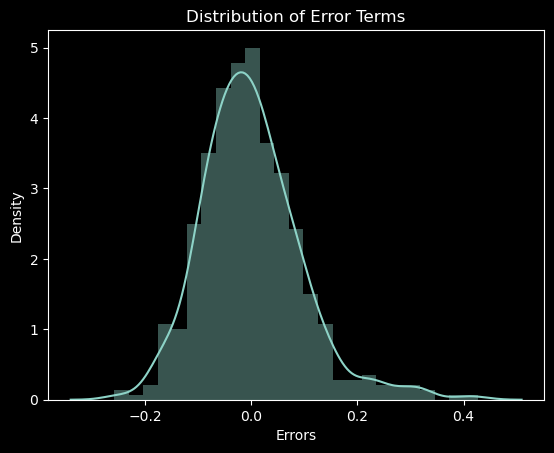

In [91]:
# plotting distplot to check the normality 
sns.distplot(residual)
plt.title("Distribution of Error Terms")
plt.xlabel('Errors')
plt.show() 

- As we can see, distribution of error terms is centered around 0 and is approxiamtely normal.
- Since, the residuals are following a normal distibution with a mean 0, we can conclude that fundamental assumption of linear regression is respected in this case.
- Normality of errors also tells that there are no other variables that could have been added to explain the variance of our target variable better and hence this is the best model. 

## Step 7: Making Predictions
- Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on test sets

In [97]:
# scaling test set's numerical variables
num_vars = ['days', 'temp', 'hum', 'windspeed', 'cnt']

# transforming
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head() 

,days,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Mist,Rainy,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
622,0.853224,1,0,0,0.684333,0.399894,0.437427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
144,0.197531,0,0,1,0.749751,0.647902,0.235530,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
404,0.554184,1,0,0,0.256524,0.476898,0.321675,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
276,0.378601,0,0,1,0.529616,0.665427,0.347250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
535,0.733882,1,0,1,0.901354,0.515135,0.148050,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


- Splitting into X_test and y_test

In [50]:
# response variable i.e. count of users = casual + registered
y_test = df_test.pop('cnt')

# features
X_test = df_test

In [101]:
# we also need to drop the variables that are not used for our final model
X_test_lm = X_test[list(vif.Features)]
X_test_lm = sm.add_constant(X_test_lm)
X_test_lm.head() 

,const,yr,holiday,temp,windspeed,Spring,Winter,Rainy,Sep,Summer,Mist
622,1.0,1,0,0.684333,0.437427,0,0,0,1,0,0
144,1.0,0,0,0.749751,0.235530,0,0,0,0,1,0
404,1.0,1,0,0.256524,0.321675,1,0,0,0,0,0
276,1.0,0,0,0.529616,0.347250,0,1,0,0,0,0
535,1.0,1,0,0.901354,0.148050,0,0,0,0,1,0


In [104]:
# making predictions using our best model that had ~78% of R-squared
y_test_pred = lm.predict(X_test_lm)
y_test_pred.head() 

622    0.789498
144    0.583469
404    0.440917
276    0.493275
535    0.902080
dtype: float64

## Step 8: Model Evaluation

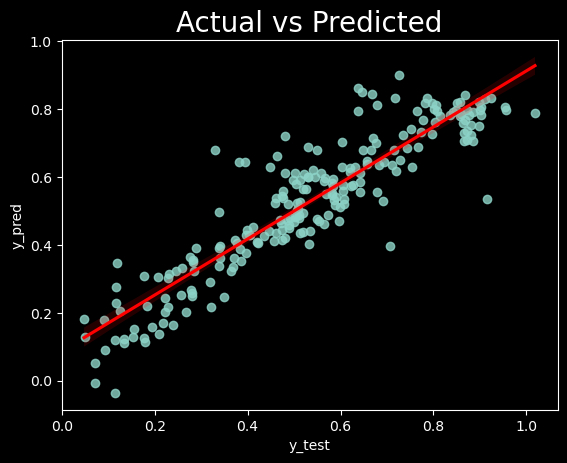

In [105]:
# plotting y_test and y_test_pred to understand the spread
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={'color':'red'})  
plt.title('Actual vs Predicted', fontsize = 20)             
plt.xlabel('y_test')                         
plt.ylabel('y_pred')   
plt.show()

In [106]:
#r2_score train set
r2_score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R-squared of train set is ', r2_score_train)

# r2_score of test set
r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R-squared of test set is ', r2_score_test)

R-squared of train set is  0.8229180271341942
R-squared of test set is  0.827869284750488


- There is only 0.049 approx. difference in $R^2$ values of train and test set which is very small.
- This consistency in $R^2$ values across training and test sets implies that the model is robust. 
- Hence, model's performance is stable and reliable. 

In [107]:
#finding out the mean squared error 

# on trained set
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print('Mean squared error of the train set is', train_mse)

# on test set
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008983208521811299
Mean squared error of the test set is 0.009106849397631452


- 0 MSE implies model accurately predicts the variance of target variable for both train and test set

We can see that the equation of our best fitted line is:
<br>
$ cnt = 0.2358\times yr - 0.1138\times holiday + 0.4838\times temp - 0.1083\times Windspeed - 0.0733\times Spring + 0.0855\times Winter - 0.2698\times Rainy + 0.0808\times Sep +0.0570\times Summer - 0.0738\times Mist + 0.1892 $
<br>
Overall, we have a decent model with R-squared of 0.823 and Adj, R-squared of 0.819.

# Summary
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1. The R-squared value of the train set is 82.29% whereas the test set has a value of 82.78% which suggests that our model is performing well and explains the variance quite accurately on the test set and thus we can conclude that it is a robust model.
<br><br>
2. Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.
<br><br>
3. We can conclude that the bike demands for the BoomBikes is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September and October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays.
<br><br>
4. These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and winter season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.